In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv('PSCompPars_2023.04.16_08.26.01.csv', header=88)

#NASA Exoplanet Archive
#NASA Exoplanet Insitute
# https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars

In [3]:
df

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,326.030000,0.320000,...,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.219970,3.200000,...,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,185.840000,0.230000,...,-0.71400,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.038901,1.677089,...,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.500000,1.000000,...,-0.01110,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5327,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.617033,0.000023,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5328,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.258000,0.064000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5329,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.460000,0.570000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5330,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.200000,2.800000,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513


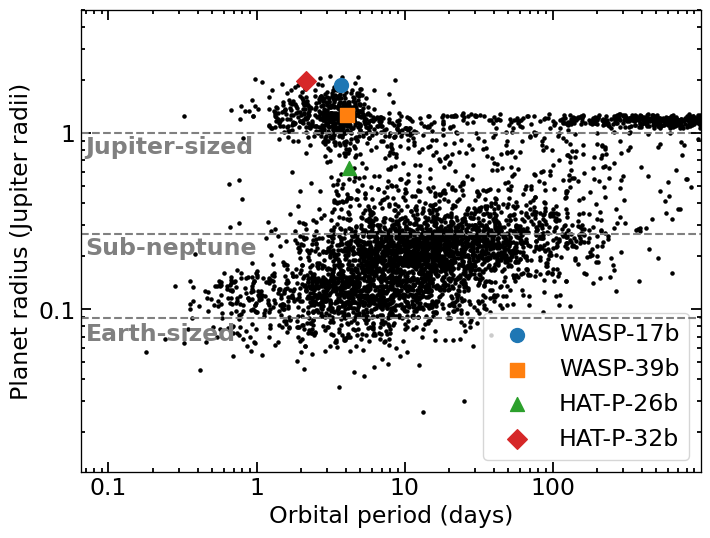

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xscale('log', base=10) 
ax.set_yscale('log', base=10) 


ax1 = ax.twinx()
ax3 = ax.twiny()



ax3.set_xscale('log', base=10) 
ax1.set_ylim(ax.get_ylim())
ax3.set_xlim(ax.get_xlim())


ax.scatter(df["pl_orbper"], df["pl_radj"], s=5, color="black", zorder=0)
ax.scatter(df.loc[df["pl_name"]=="WASP-17 b"]["pl_orbper"], df.loc[df["pl_name"]=="WASP-17 b"]["pl_radj"], s=100, label="WASP-17b", zorder=10) 
ax.scatter(df.loc[df["pl_name"]=="WASP-39 b"]["pl_orbper"], df.loc[df["pl_name"]=="WASP-39 b"]["pl_radj"], s=100, label="WASP-39b", marker="s", zorder=10) 
ax.scatter(df.loc[df["pl_name"]=="HAT-P-26 b"]["pl_orbper"], df.loc[df["pl_name"]=="HAT-P-26 b"]["pl_radj"], s=100, label="HAT-P-26b", marker="^", zorder=10)
ax.scatter(df.loc[df["pl_name"]=="HAT-P-32 b"]["pl_orbper"], df.loc[df["pl_name"]=="HAT-P-32 b"]["pl_radj"], s=100, label="HAT-P-32b", marker="D", zorder=10)




ax.axhline(1, linestyle='--', color="gray", zorder=20) #Jupiter radius
ax.axhline(0.267644, linestyle='--', color="gray", zorder=20) #Sub-neptune
ax.axhline(0.0892147, linestyle='--', color="gray", zorder=20) #Earth-sized
ax.annotate("Jupiter-sized", xy=(0.07, 0.76), color="gray", weight="semibold", size=17, zorder=20)
ax.annotate("Sub-neptune", xy=(0.07, 0.205), color="gray", weight="semibold", size=17, zorder=20)
ax.annotate("Earth-sized", xy=(0.07, 0.066), color="gray", weight="semibold", size=17, zorder=20)


ax.set_xlabel("Orbital period (days)", size=17)
ax.set_ylabel("Planet radius (Jupiter radii)", size=17)
 
ax1.set_xscale('log',base=10) 
ax1.set_yscale('log',base=10) 

ax.set_xlim(0.065, 999)
ax.set_ylim(0.012, 5)


ax1.set_ylim(ax.get_ylim())
ax3.set_xlim(ax.get_xlim())


ax1.set_yticklabels([])
ax3.set_xticklabels([])

ax.tick_params(which='both', direction = 'in', width=1.3, length=7)
ax1.tick_params(which='both', direction = 'in', width=1.3, length=7)
ax3.tick_params(which='both', direction = 'in', width=1.3, length=7)

ax.tick_params(which='minor', length=2.8)
ax1.tick_params(which='minor', length=2.8)
ax3.tick_params(which='minor', length=2.8)

ax.xaxis.set_tick_params(labelsize=17)
ax.yaxis.set_tick_params(labelsize=17)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))

ax.legend(loc='lower right', prop={'size': 17})

plt.show()
